# Data Exploration of COVID-19
14 March 2020

Cecilia García López de Munain

## Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import pickle

## Parameters

In [2]:
sys.path.append('./')

In [13]:
PATH_ROOT_INPUT_DATA = 'data\\input'
INPUT_DATA_NAME = 'COVID-19-geographic-disbtribution-worldwide-2020-03-22.xlsx'
INPUT_DATA_POPULATION_NAME = 'population_by_country.csv'
INPUT_DATA_POPDENSITY_NAME = 'populationdensity_by_country.csv'

PATH_ROOT_INTERIM_DATA = 'data\\interim'
INTERIM_DATA_NAME = 'covid_19_data_cum.pkl'

## Import Data

### Population Data

Source: UN

In [4]:
population_by_country = pd.read_csv(os.path.join(PATH_ROOT_INPUT_DATA,INPUT_DATA_POPULATION_NAME), skiprows=4)

In [5]:
population_by_country.head()

,Country Name,2018
0,Aruba,105845.0
1,Afghanistan,37172386.0
2,Angola,30809762.0
3,Albania,2866376.0
4,Andorra,77006.0


In [6]:
population_by_country.rename(columns={'2018':'Population'}, inplace=True)

In [7]:
population_by_country.dtypes

Country Name     object
Population      float64
dtype: object

### Population Density Data

Source: UN

In [8]:
popdensity_by_country = pd.read_csv(os.path.join(PATH_ROOT_INPUT_DATA,INPUT_DATA_POPDENSITY_NAME), skiprows=4)

In [9]:
popdensity_by_country.head()

,Country Name,2018
0,Aruba,588.027778
1,Afghanistan,56.937760
2,Angola,24.713052
3,Albania,104.612263
4,Andorra,163.842553


In [10]:
popdensity_by_country.rename(columns={'2018':'Population Density'}, inplace=True)

In [11]:
popdensity_by_country.dtypes

Country Name           object
Population Density    float64
dtype: object

### COVID Data

Source: https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide

In [38]:
covid19_data = pd.read_excel(os.path.join(PATH_ROOT_INPUT_DATA,INPUT_DATA_NAME))

In [39]:
covid19_data.head()

,DateRep,Day,Month,Year,NewConfCases,NewDeaths,CountryExp,GeoId
0,2020-03-22,22,3,2020,0,0,Afghanistan,AF
1,2020-03-21,21,3,2020,2,0,Afghanistan,AF
2,2020-03-20,20,3,2020,0,0,Afghanistan,AF
3,2020-03-19,19,3,2020,0,0,Afghanistan,AF
4,2020-03-18,18,3,2020,1,0,Afghanistan,AF


In [40]:
covid19_data.dtypes

DateRep         datetime64[ns]
Day                      int64
Month                    int64
Year                     int64
NewConfCases             int64
NewDeaths                int64
CountryExp              object
GeoId                   object
dtype: object

In [41]:
covid19_data.shape

(6188, 8)

In [42]:
# Checking for nulls
covid19_data.isnull().sum()

DateRep         0
Day             0
Month           0
Year            0
NewConfCases    0
NewDeaths       0
CountryExp      0
GeoId           8
dtype: int64

In [43]:
# Don't know what this feature is so it doesn't matter for now
# covid19_data[~covid19_data.Gaul1Nuts1.isnull()].head()

## Prepare Data

COVID Data

In [44]:
# Set datetime index
covid19_data.set_index('DateRep', inplace=True)

In [45]:
covid19_data.head()

,Day,Month,Year,NewConfCases,NewDeaths,CountryExp,GeoId
DateRep,,,,,,,
2020-03-22,22,3,2020,0,0,Afghanistan,AF
2020-03-21,21,3,2020,2,0,Afghanistan,AF
2020-03-20,20,3,2020,0,0,Afghanistan,AF
2020-03-19,19,3,2020,0,0,Afghanistan,AF
2020-03-18,18,3,2020,1,0,Afghanistan,AF


In [46]:
covid19_data.sort_index(inplace=True)

In [49]:
# Group by country
groupcols = ['CountryExp']

In [50]:
# Create cumulative features
covid19_data['NewConfCases_cum'] = covid19_data.groupby(groupcols)['NewConfCases'].cumsum()
covid19_data['NewDeaths_cum'] = covid19_data.groupby(groupcols)['NewDeaths'].cumsum()

In [51]:
covid19_data.CountryExp.unique()[:2]

array(['North_Macedonia', 'Azerbaijan'], dtype=object)

In [52]:
# Checks
covid19_data[covid19_data['CountryExp'].isin(['Afghanistan', 'Albania'])].tail(10)

,Day,Month,Year,NewConfCases,NewDeaths,CountryExp,GeoId,NewConfCases_cum,NewDeaths_cum
DateRep,,,,,,,,,
2020-03-18,18,3,2020,1,0,Afghanistan,AF,22,0
2020-03-18,18,3,2020,4,0,Albania,AL,55,1
2020-03-19,19,3,2020,0,0,Afghanistan,AF,22,0
2020-03-19,19,3,2020,4,1,Albania,AL,59,2
2020-03-20,20,3,2020,0,0,Afghanistan,AF,22,0
2020-03-20,20,3,2020,11,0,Albania,AL,70,2
2020-03-21,21,3,2020,2,0,Afghanistan,AF,24,0
2020-03-21,21,3,2020,0,0,Albania,AL,70,2
2020-03-22,22,3,2020,6,0,Albania,AL,76,2


## Plot exploration

### Plot cases confirmed by date

In [53]:
covid19_data_bydate = covid19_data.groupby(covid19_data.index)['NewConfCases'].sum()

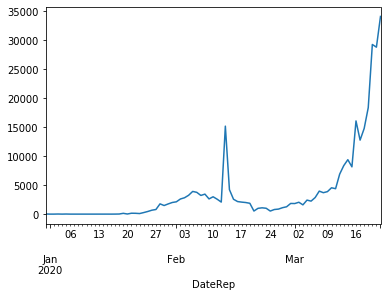

In [54]:
covid19_data_bydate.plot()

In [55]:
# Huge peak in February
covid19_data[covid19_data['NewConfCases'] >= 12000]

,Day,Month,Year,NewConfCases,NewDeaths,CountryExp,GeoId,NewConfCases_cum,NewDeaths_cum
DateRep,,,,,,,,,
2020-02-13,13,2,2020,15141,254,China,CN,59865,1368


In [56]:
covid19_data[covid19_data.index == '2020-02-13'].sort_values('NewConfCases', ascending=False).head()

,Day,Month,Year,NewConfCases,NewDeaths,CountryExp,GeoId,NewConfCases_cum,NewDeaths_cum
DateRep,,,,,,,,,
2020-02-13,13,2,2020,15141,254,China,CN,59865,1368
2020-02-13,13,2,2020,4,1,Japan,JP,29,1
2020-02-13,13,2,2020,3,0,Singapore,SG,50,0
2020-02-13,13,2,2020,1,0,United_States_of_America,US,14,0
2020-02-13,13,2,2020,1,0,United_Kingdom,UK,9,0


In [57]:
# Because China has a different scale I'm separating it
covid19_data_china = covid19_data[covid19_data['CountryExp'] == 'China']
covid19_data_nonchina = covid19_data[covid19_data['CountryExp'] != 'China']

#### China 

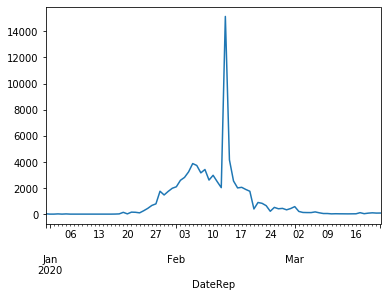

In [58]:
covid19_data_bydate_china = covid19_data_china.groupby(covid19_data_china.index)['NewConfCases'].sum()
covid19_data_bydate_china.plot()

#### Non China

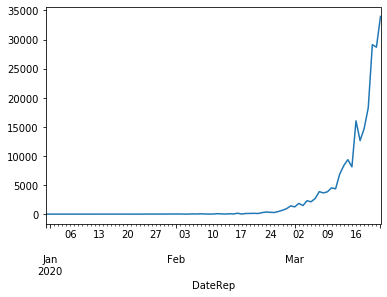

In [59]:
covid19_data_bydate_nonchina = covid19_data_nonchina.groupby(covid19_data_nonchina.index)['NewConfCases'].sum()
covid19_data_bydate_nonchina.plot()

While China seems to have passed the worst phase of the disease, the rest of the countries seem to be entering it

#### Countries worst infected

In [60]:
countries_worst = covid19_data_nonchina.groupby(['CountryExp'])['NewConfCases'].sum().sort_values(ascending=False).head(15).index
covid19_data_nonchina.groupby(['CountryExp'])['NewConfCases'].sum().sort_values(ascending=False).head(15)

CountryExp
Italy                       53578
United_States_of_America    26747
Spain                       24926
Germany                     21463
Iran                        20610
France                      14459
South_Korea                  8897
Switzerland                  6077
United_Kingdom               5018
Netherlands                  3631
Austria                      3024
Belgium                      2815
Norway                       1926
Sweden                       1746
Denmark                      1326
Name: NewConfCases, dtype: int64

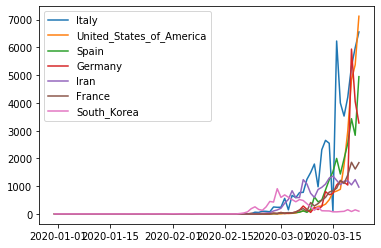

In [62]:
for i, country in enumerate(countries_worst): 
    data = covid19_data_nonchina[covid19_data_nonchina['CountryExp'] == country].groupby(covid19_data_nonchina[covid19_data_nonchina['CountryExp'] == country].index)['NewConfCases'].sum()
    plt.plot(data, label=country)
    if i == 6:
        break
plt.legend()

South Korea seems to be handling it differently.

## Contagion trend evolution analysis

### Plot cumulative features

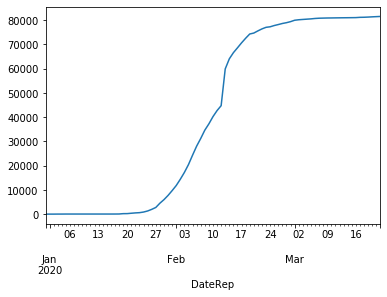

In [63]:
country_filter = 'China'
covid19_data[covid19_data['CountryExp'] == country_filter]['NewConfCases_cum'].plot()

China is entering a stationary phase

In [64]:
countries_worst

Index(['Italy', 'United_States_of_America', 'Spain', 'Germany', 'Iran',
       'France', 'South_Korea', 'Switzerland', 'United_Kingdom', 'Netherlands',
       'Austria', 'Belgium', 'Norway', 'Sweden', 'Denmark'],
      dtype='object', name='CountryExp')

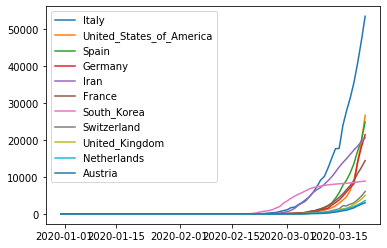

In [65]:
for i, country in enumerate(countries_worst): 
    plt.plot(covid19_data[covid19_data['CountryExp'] == country]['NewConfCases_cum'], label=country)
    if i == 10:
        break
plt.legend()

Other countries (non China) seem to be still raising. South Korea has a different behaviour - ? 

## Join datasets

In [66]:
population_by_country.head()

,Country Name,Population
0,Aruba,105845.0
1,Afghanistan,37172386.0
2,Angola,30809762.0
3,Albania,2866376.0
4,Andorra,77006.0


In [67]:
covid19_data.head()

,Day,Month,Year,NewConfCases,NewDeaths,CountryExp,GeoId,NewConfCases_cum,NewDeaths_cum
DateRep,,,,,,,,,
2019-12-31,31,12,2019,0,0,North_Macedonia,MK,0,0
2019-12-31,31,12,2019,0,0,Azerbaijan,AZ,0,0
2019-12-31,31,12,2019,0,0,Singapore,SG,0,0
2019-12-31,31,12,2019,0,0,Brazil,BR,0,0
2019-12-31,31,12,2019,0,0,Kuwait,KW,0,0


Joining with population data

In [68]:
covid19_data_pop = covid19_data.reset_index().merge(population_by_country, how='left', left_on='CountryExp', right_on='Country Name').set_index('DateRep')

In [69]:
covid19_data_pop.head()

,Day,Month,Year,NewConfCases,NewDeaths,CountryExp,GeoId,NewConfCases_cum,NewDeaths_cum,Country Name,Population
DateRep,,,,,,,,,,,
2019-12-31,31,12,2019,0,0,North_Macedonia,MK,0,0,NaN,NaN
2019-12-31,31,12,2019,0,0,Azerbaijan,AZ,0,0,Azerbaijan,9942334.0
2019-12-31,31,12,2019,0,0,Singapore,SG,0,0,Singapore,5638676.0
2019-12-31,31,12,2019,0,0,Brazil,BR,0,0,Brazil,209469333.0
2019-12-31,31,12,2019,0,0,Kuwait,KW,0,0,Kuwait,4137309.0


Joining with population density data

In [70]:
covid19_data_popden = covid19_data_pop.reset_index().merge(popdensity_by_country, how='left', left_on='CountryExp', right_on='Country Name').set_index('DateRep')

In [71]:
covid19_data_popden.head()

,Day,Month,Year,NewConfCases,NewDeaths,CountryExp,GeoId,NewConfCases_cum,NewDeaths_cum,Country Name_x,Population,Country Name_y,Population Density
DateRep,,,,,,,,,,,,,
2019-12-31,31,12,2019,0,0,North_Macedonia,MK,0,0,NaN,NaN,NaN,NaN
2019-12-31,31,12,2019,0,0,Azerbaijan,AZ,0,0,Azerbaijan,9942334.0,Azerbaijan,120.265320
2019-12-31,31,12,2019,0,0,Singapore,SG,0,0,Singapore,5638676.0,Singapore,7952.998418
2019-12-31,31,12,2019,0,0,Brazil,BR,0,0,Brazil,209469333.0,Brazil,25.061716
2019-12-31,31,12,2019,0,0,Kuwait,KW,0,0,Kuwait,4137309.0,Kuwait,232.172222


In [72]:
covid19_data_popden.drop(columns=['Country Name_x','Country Name_y'], inplace=True)

# Export

In [73]:
with open(os.path.join(PATH_ROOT_INTERIM_DATA,INTERIM_DATA_NAME), 'wb') as f:
    pickle.dump(covid19_data_popden, f)